# Session-4 Solutions

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)    # Data manipulate
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(ggplot2)       # Visualization
library(pROC)          # AUC, ROC
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loaded gbm 2.1.8



## Solution 1

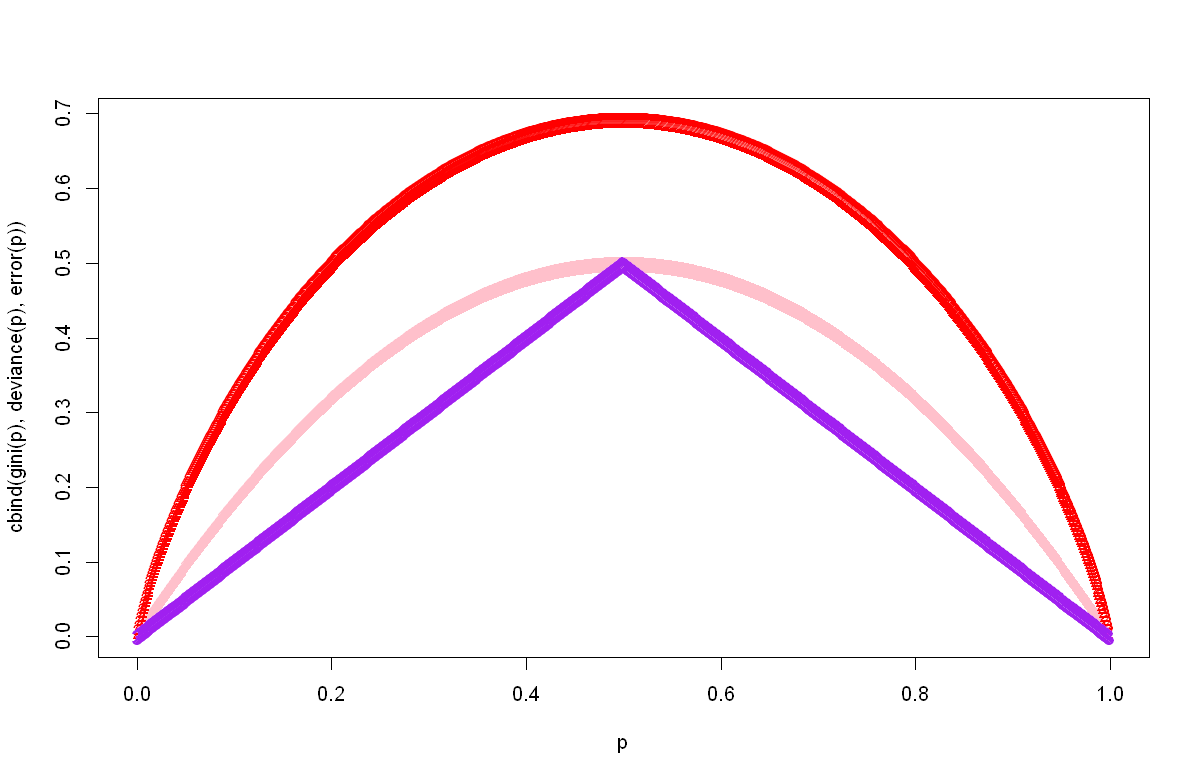

In [2]:
# Node impurity function for 2-class classification
error <- function(pmk) { pmin(1 - pmk, pmk) }  # Misclassification error
gini <- function(pmk) { pmk * (1 - pmk) + (1 - pmk) * pmk }  # Gini index
deviance <- function(pmk) { -pmk * log(pmk) - (1 - pmk) * log(1 - pmk) }  # Cross-entropy or deviance

# Create p value in [0; 1]
p <- seq(0, 1, 0.001)

options(repr.plot.width=10, repr.plot.height=6.5) #set the plot size

# Plot 3 inpurity function for 2-class classification
matplot(p, cbind(gini(p), deviance(p), error(p)), col = c("pink", "red", "purple"))

## Solution-2

-In the majority vote approach ,As red is the most occuring class amongst the 10 predictors ,So we classify X as RED.
<br>-In the average probability approach , we classify X as GREEN as the average of the 10 probabilities is 0.45.

## Solution -3

In [3]:
library(ISLR)
head(Carseats)
summary(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [4]:
# Train-test split
set.seed(1)  # High variance
train_idx <- sample(1:nrow(Carseats), 300)
train_CS <- Carseats[train_idx, ]  
test_CS <- Carseats[-train_idx, ]

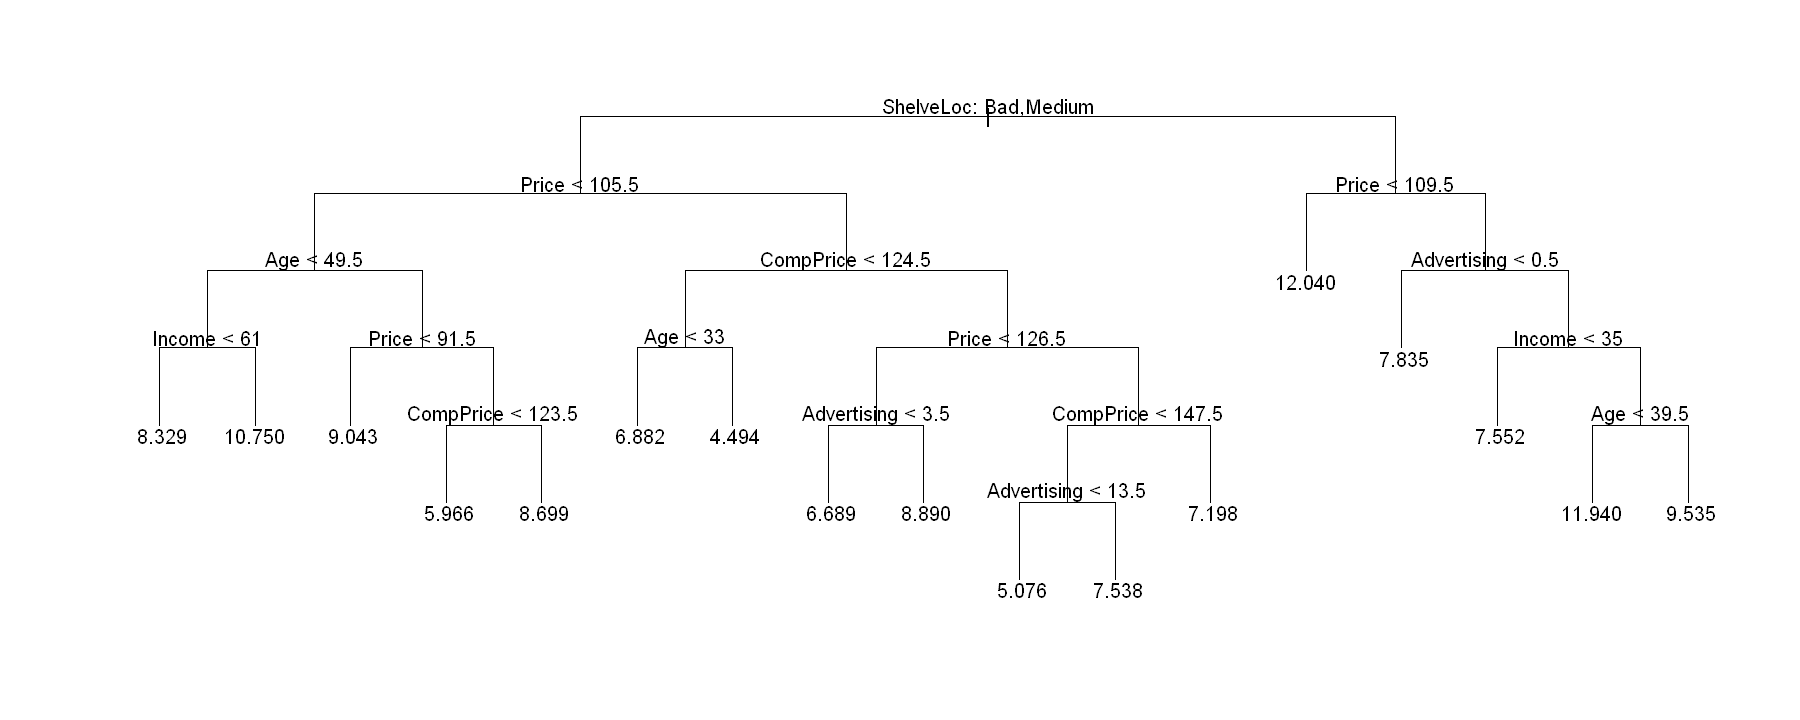

In [5]:
# Fit full regression tree (top-down greedy splitting)
library(tree)
CS_regtree <- tree(Sales~., data=train_CS)

# Plot the regression tree
options(repr.plot.width=15, repr.plot.height=6)
plot(CS_regtree, type='uniform')
text(CS_regtree, pretty=0)

In [6]:
# Print out the tree details
CS_regtree

node), split, n, deviance, yval
      * denotes terminal node

 1) root 300 2385.000  7.640  
   2) ShelveLoc: Bad,Medium 226 1349.000  6.818  
     4) Price < 105.5 74  389.300  8.314  
       8) Age < 49.5 26   83.180  9.914  
        16) Income < 61 9   10.930  8.329 *
        17) Income > 61 17   37.660 10.750 *
       9) Age > 49.5 48  203.500  7.447  
        18) Price < 91.5 16   36.900  9.043 *
        19) Price > 91.5 32  105.400  6.649  
          38) CompPrice < 123.5 24   52.760  5.966 *
          39) CompPrice > 123.5 8    7.882  8.699 *
     5) Price > 105.5 152  713.400  6.089  
      10) CompPrice < 124.5 53  191.000  4.990  
        20) Age < 33 11   26.100  6.882 *
        21) Age > 33 42  115.200  4.494 *
      11) CompPrice > 124.5 99  424.000  6.678  
        22) Price < 126.5 45  134.500  7.667  
          44) Advertising < 3.5 25   56.830  6.689 *
          45) Advertising > 3.5 20   23.870  8.890 *
        23) Price > 126.5 54  208.700  5.854  
          46) Com

In [7]:
#Test error rate
tree.pred = predict(CS_regtree,newdata = test_CS)
mean((tree.pred - test_CS$Sales)^2)

[1] 4.910268

The test error rate is 4.9

In [8]:
#Cross-validation
CV_Carseats = cv.tree(CS_regtree)
names(CV_Carseats)
CV_Carseats

[1] "size"   "dev"    "k"      "method"

$size
 [1] 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 1329.084 1347.121 1364.654 1364.654 1350.448 1350.771 1321.314 1405.099
 [9] 1400.974 1404.145 1416.479 1463.155 1487.665 1486.232 1608.966 1830.224
[17] 2399.382

$k
 [1]      -Inf  26.52497  29.11686  29.39307  34.13814  34.59496  40.44541
 [8]  44.79934  49.69942  53.81690  61.12042  80.71971  98.42378 102.63600
[15] 151.23040 246.31381 619.17528

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

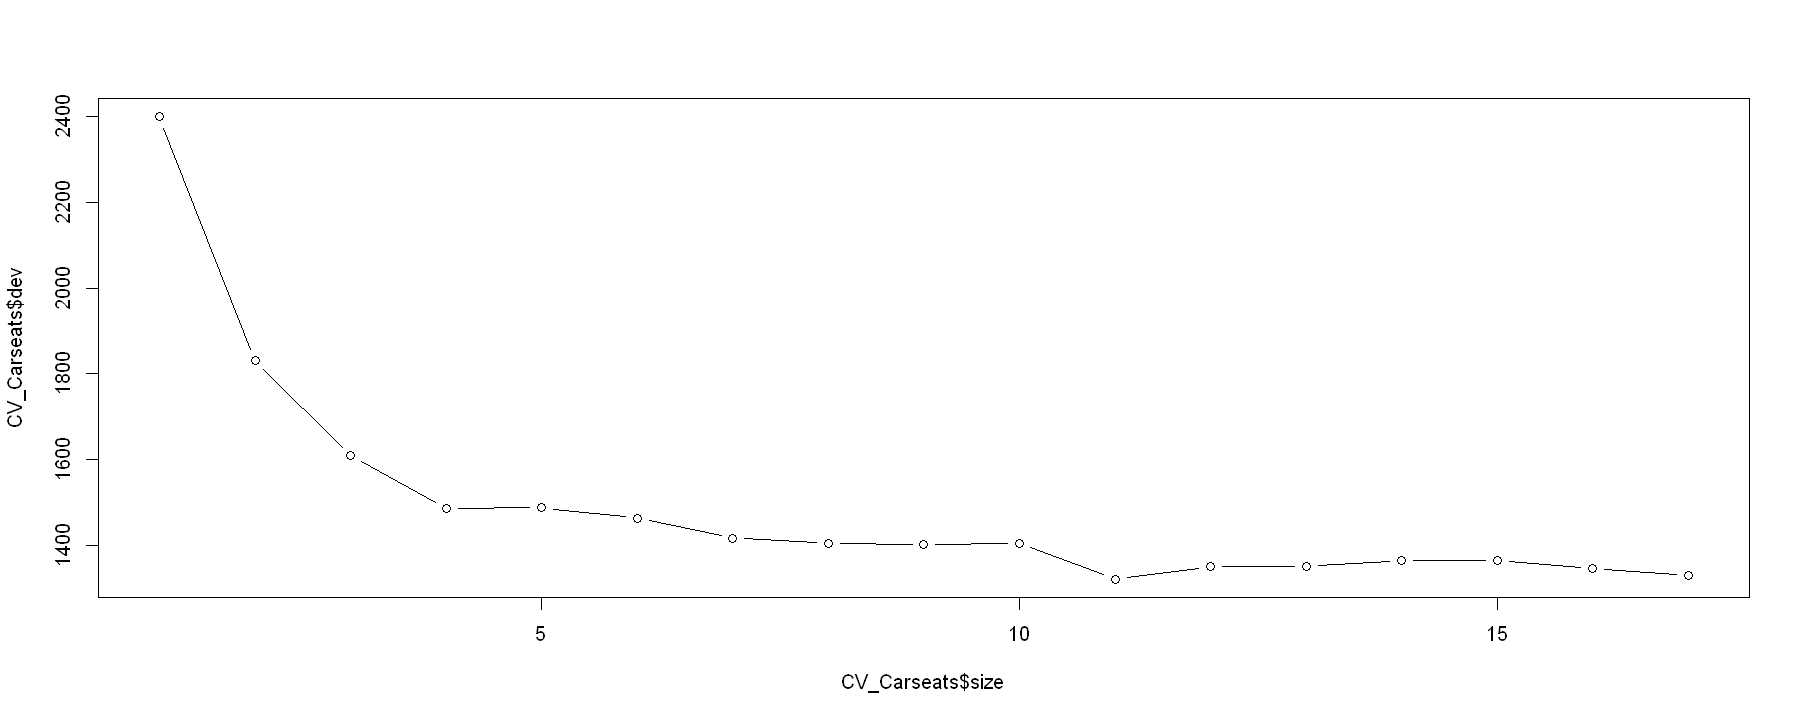

In [9]:
#plot 
plot(CV_Carseats$size, CV_Carseats$dev,type="b")

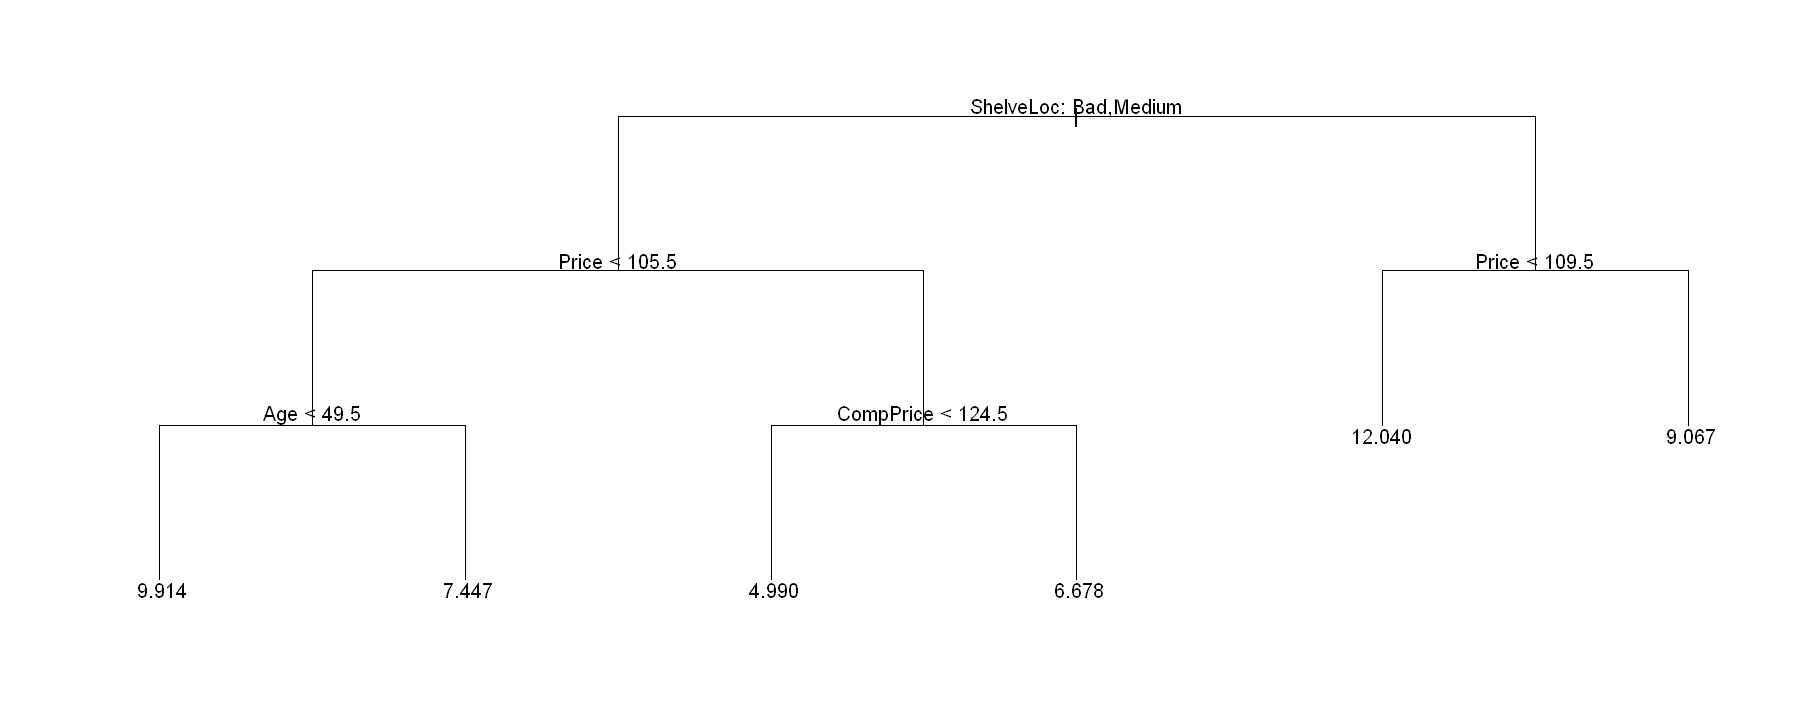

In [10]:
# Prune the tree
prune_regtree <- prune.tree(CS_regtree, best=6)

# Show the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(prune_regtree, type='uniform')
text(prune_regtree, pretty=0)

In [11]:
# RSS full Regression Tree
pred_full_regtree <- predict(CS_regtree, newdata=test_CS)
mse_full_regtree <- mean((tree.pred - test_CS$Sales)^2)
mse_full_regtree

# RSS pruned Regression Tree
pred_pruned_regtree <- predict(prune_regtree, newdata=test_CS)
mse_pruned_regtree <- mean((pred_pruned_regtree - test_CS$Sales)^2)
mse_pruned_regtree

[1] 4.910268

[1] 5.456195

After pruning ,the regression tree increases the test error rate to 5.4

In [12]:
# Fit bagging model, use all predictors
CS_bagtree <- randomForest(Sales~., data=train_CS, mtry=10, importance=T)
CS_bagtree


Call:
 randomForest(formula = Sales ~ ., data = train_CS, mtry = 10,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.431734
                    % Var explained: 69.41

[1] 2.819484

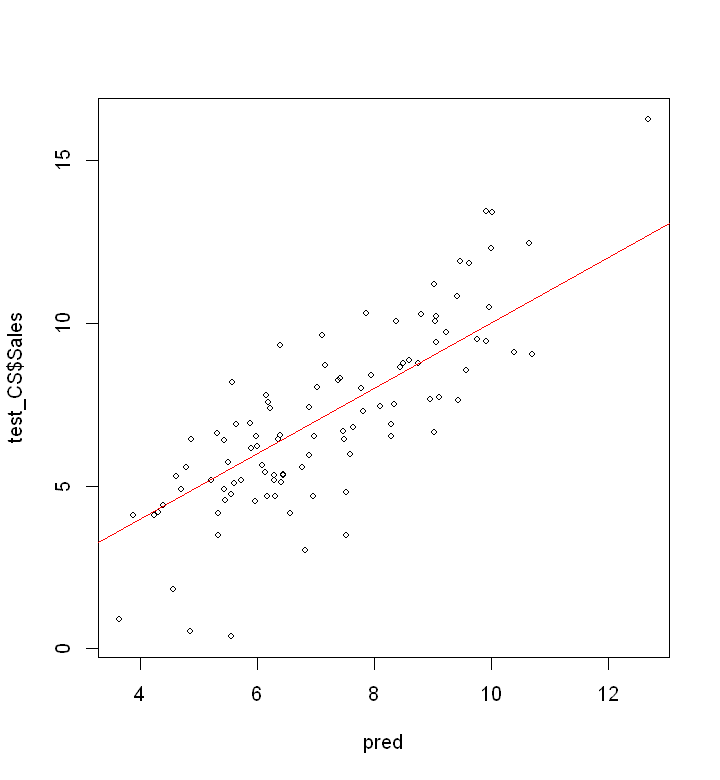

In [13]:
# Make prediction
pred <- predict(CS_bagtree, newdata=test_CS)

options(repr.plot.width=6, repr.plot.height=6.5)
plot(pred, test_CS$Sales, cex=0.7)
abline(0, 1, col='red')

# MSE
mean((pred - test_CS$Sales) ^ 2)

In [14]:
#get the important variables
importance(CS_bagtree)

,%IncMSE,IncNodePurity
CompPrice,36.1725054,243.07703
Income,7.9178958,131.24191
Advertising,21.3369714,170.74795
Population,-3.5681090,70.02920
Price,69.0435743,699.91320
ShelveLoc,78.4937092,692.52513
Age,26.6121120,249.06737
Education,4.2335791,56.34447
Urban,0.3606764,10.81074
US,2.1801579,10.90539


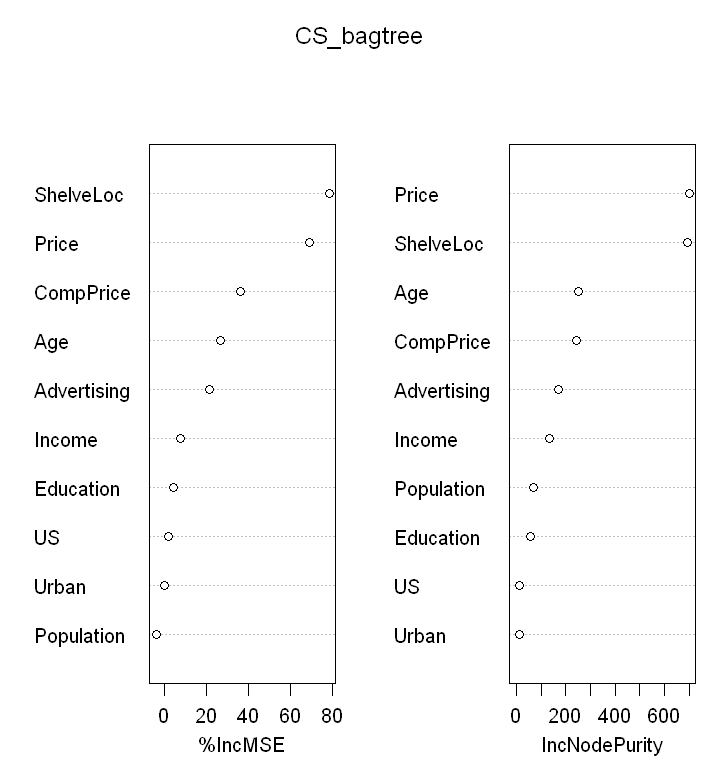

In [15]:
#Plot
varImpPlot(CS_bagtree)

<b>The test error rate for bagged regression tree is 2.7.
<br><b>The important variables are price of the carseats and quality of shelving location of carseats.

In [16]:
#Random forest
RF1.carseats <- randomForest(Sales~.,data=train_CS,mtry=6,importance=T)#no of variables at each split is 6


#Prediction for mtry-no of variables at each split is 6
pred.RF1 <- predict(RF1.carseats,newdata=test_CS)
mean((pred.RF1 - test_CS$Sales) ^ 2)

[1] 2.785089

In [17]:
#Random forest
RF2.carseats = randomForest(Sales~.,data=train_CS,mtry=3,importance=T)#no of variables at each split is 3


#Prediction for mtry-no of variables at each split is 3
pred.RF2 = predict(RF2.carseats,newdata=test_CS)
mean((pred.RF2 - test_CS$Sales) ^ 2)

[1] 3.150826

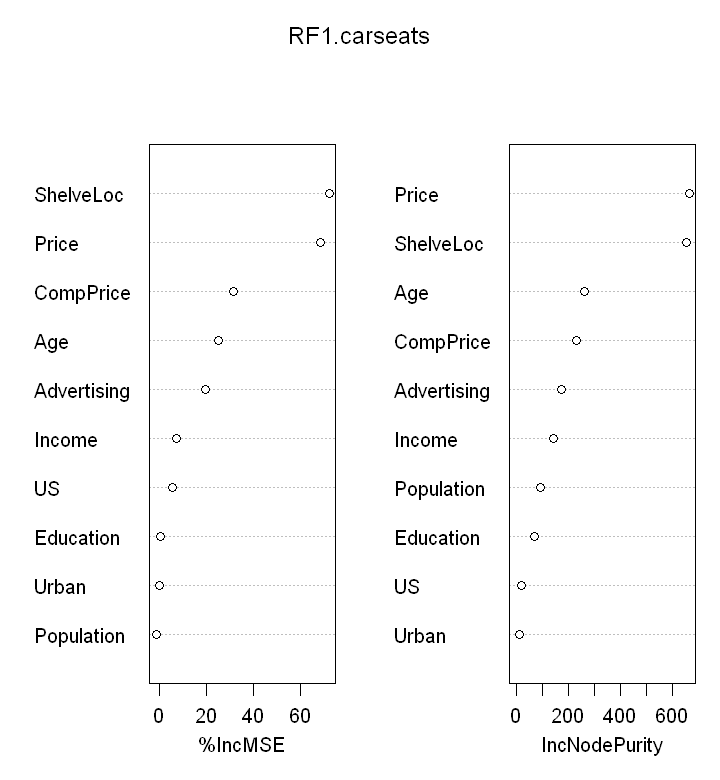

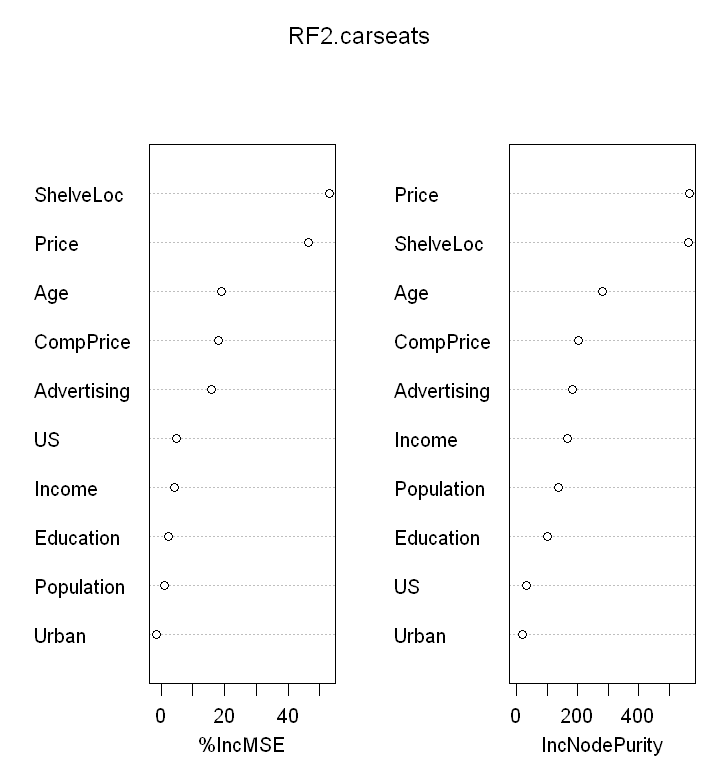

In [18]:
#Plot for determining the important variables
par(mfrow=c(2,2))
varImpPlot(RF1.carseats)
varImpPlot(RF2.carseats)

<b>The test error rate for Random forests is 3.1 , i.e higher than the bagged regression tree .So random forests method does not yield the best results here.
<br><b>The important variables are price of the carseats and quality of shelving location of carseats.

## Solution 4

In [19]:
library(ISLR)
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [20]:
#to get the desription of the dataset
?OJ

In [21]:
# Train-test split
set.seed(1)  # High variance
train_idx <- sample(1:nrow(OJ), 800)
train_OJ <- OJ[train_idx, ]  # 800 obs.
test_OJ <- OJ[-train_idx, ]  #270 obs.

In [22]:
# Fit the classification tree
OJ_classtree <- tree(Purchase ~ ., data=train_OJ)
summary(OJ_classtree)


Classification tree:
tree(formula = Purchase ~ ., data = train_OJ)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

<b>The training error rate is 15.9%
<br><b>Number of terminal nodes is 9

In [23]:
#interpreting the terminal node
OJ_classtree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

<b>Interpreting the terminal node :
<br>Customer brand loyalty for Citrus Hill-LoyalCH > 0.764572
<br>Number of obs in the branch - 261
<br>Deviance - 91.2
<br>Overall Prediction - "CH"

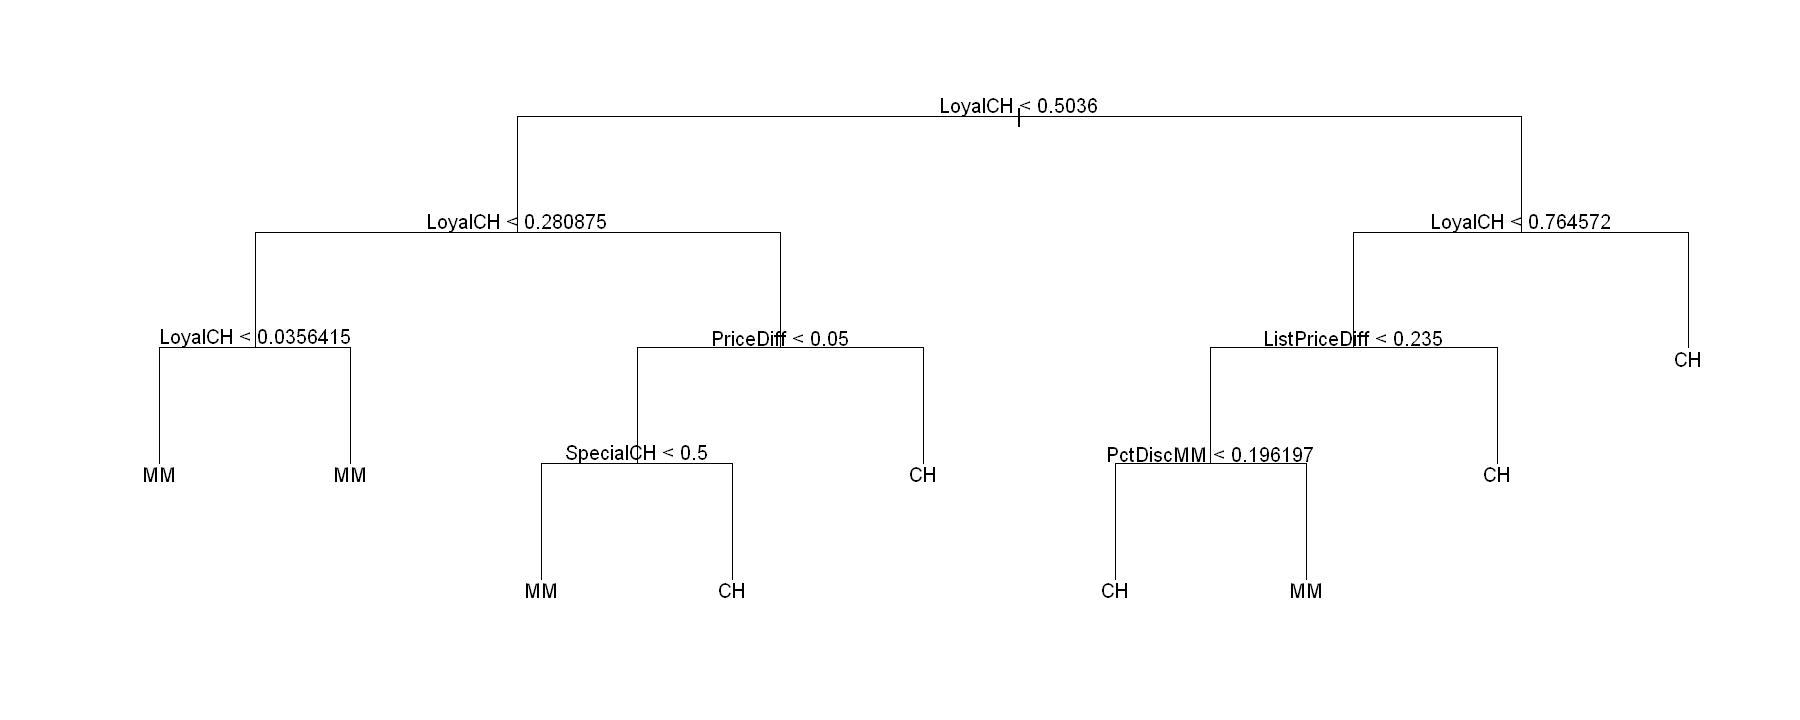

In [24]:
#Create the plot of the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(OJ_classtree, type='uniform')
text(OJ_classtree, pretty=0)

<b>The above plot gives an overview about the customer and to predict which brand of orange juice(CH or MM) they will buy.

In [25]:
#predict the response
pred <- predict(OJ_classtree, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)


    
pred  CH  MM
  CH 160  38
  MM   8  64

In [26]:
#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

[1] 82.96

In [27]:
#Test error rate
100-acc

[1] 17.04

<b>The test error rate is 17.04%

In [28]:
# Apply the cross validation 
set.seed(1)
cv_tree <- cv.tree(OJ_classtree)
cv_tree

$size
[1] 9 8 7 6 5 4 3 2 1

$dev
[1]  758.5086  775.3312  772.1547  769.2517  755.4900  792.7213  787.4097
[8]  782.2149 1075.0831

$k
[1]      -Inf  12.62207  13.94616  14.35384  26.21539  35.74964  43.07317
[8]  45.67120 293.15784

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [29]:
# Best tree size
min_idx <- which.min(cv_tree$dev)
tree_size <- cv_tree$size[min_idx]
print(paste0('Best tree size = ', tree_size))

[1] "Best tree size = 5"


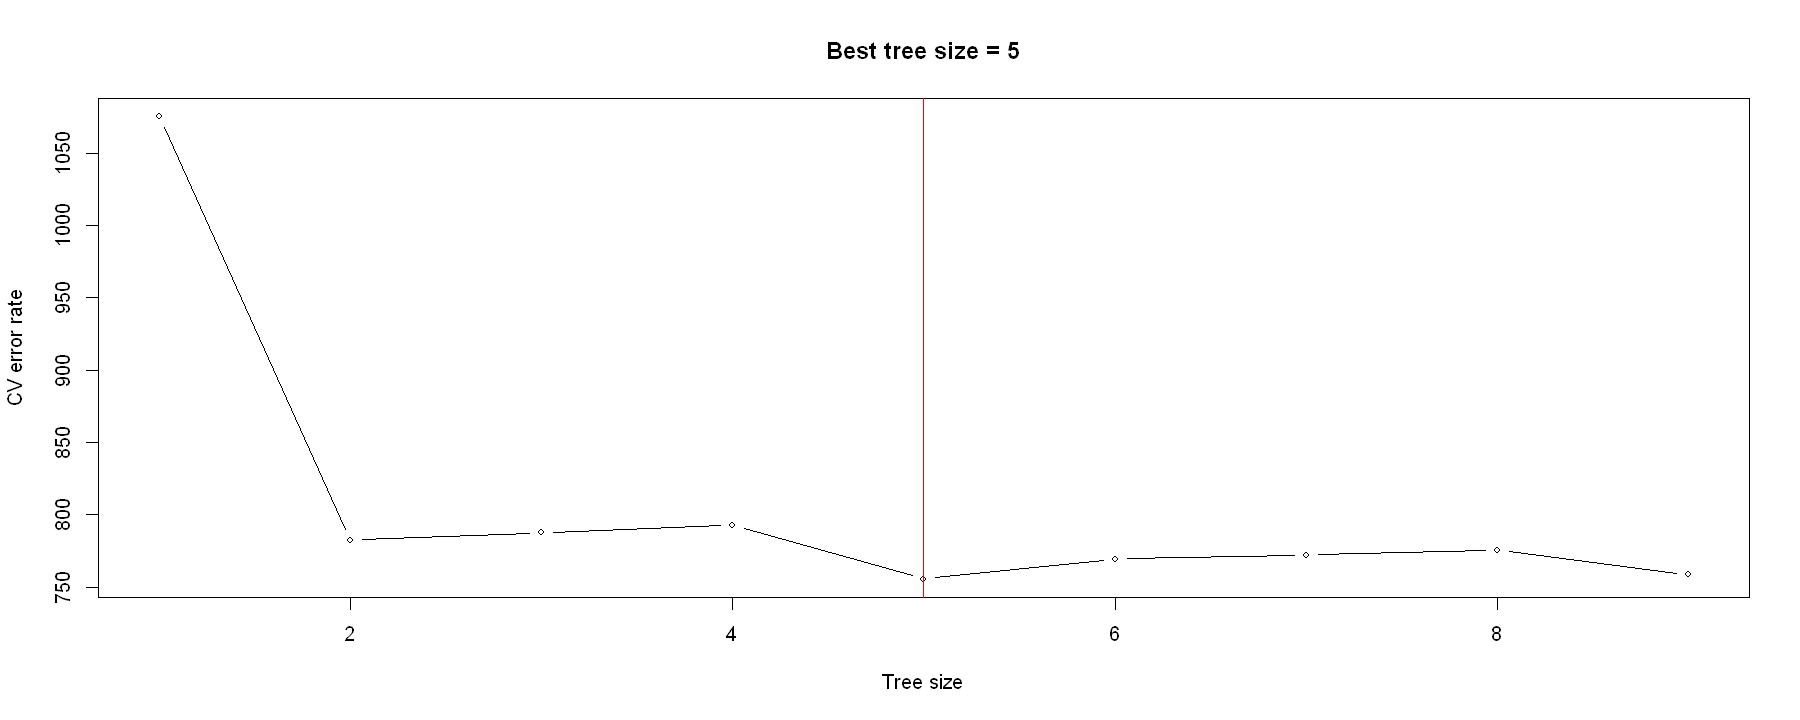

In [30]:
#plot with tree size on the x-axis and cross-validated classification error rate on the y-axis
# Tree size, number of nodes
plot(cv_tree$size, cv_tree$dev, type='b', cex=0.7,
     xlab='Tree size', ylab='CV error rate', main=paste0('Best tree size = ', tree_size)
    )
abline(v=tree_size, col='red') 

<b>From the above plot,we can see that the tree size 5 corresponds to the lowest cross-validated classification error rate

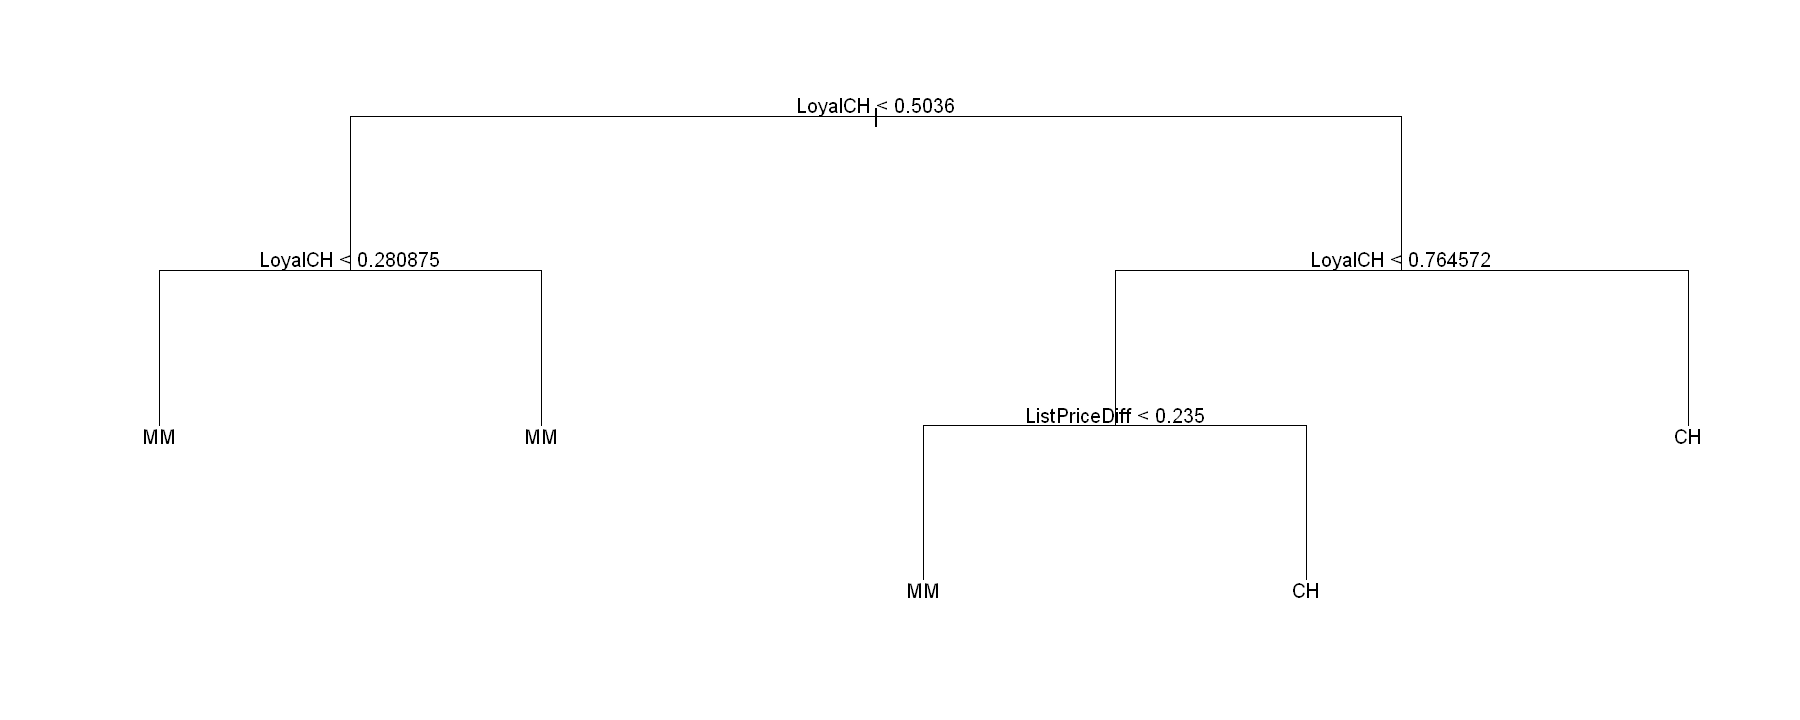

In [31]:
# Prune the tree
prune_tree <- prune.tree(OJ_classtree, best=5)

# Show the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(prune_tree, type='uniform')
text(prune_tree, pretty=0)

<b>Compare the performance of full Regression Tree and pruned Regression Tree on train data.

In [32]:
summary(prune_tree)


Classification tree:
snip.tree(tree = OJ_classtree, nodes = c(4L, 12L, 5L))
Variables actually used in tree construction:
[1] "LoyalCH"       "ListPriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.8239 = 655 / 795 
Misclassification error rate: 0.205 = 164 / 800 

<b>Conclusion:The training error rate of pruned tree is higher (20.5%)  than the unpruned tree ( 15.9%).

<b>Compare the performance of full Regression Tree and pruned Regression Tree on test data.

In [33]:
#predict the response
pred.prune <- predict(prune_tree, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred.prune, test_OJ$Purchase)

          
pred.prune  CH  MM
        CH 134  18
        MM  34  84

In [34]:
#Accuracy
acc = round(mean(pred.prune == test_OJ$Purchase)*100,2)
acc

[1] 80.74

In [35]:
#Test error rate 
100-acc

[1] 19.26

<b>Conclusion:The test error rate of prune tree is 18.52% which is higher than the non pruned test error rate 17.04%

## Solution 5

In [36]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [37]:
#description of the dataset
?Hitters

In [38]:
#Remove the observations for whom the salary information is unknown, and then log-transform the salaries
Hitters = na.omit(Hitters)
Hitters$Salary = log(Hitters$Salary)

In [39]:
# Train-test split
set.seed(1)  # High variance
train_idx <- sample(1:nrow(Hitters), 200)
train_hit <- Hitters[train_idx, ]  # 200 obs.
test_hit <- Hitters[-train_idx, ]  #63 obs.

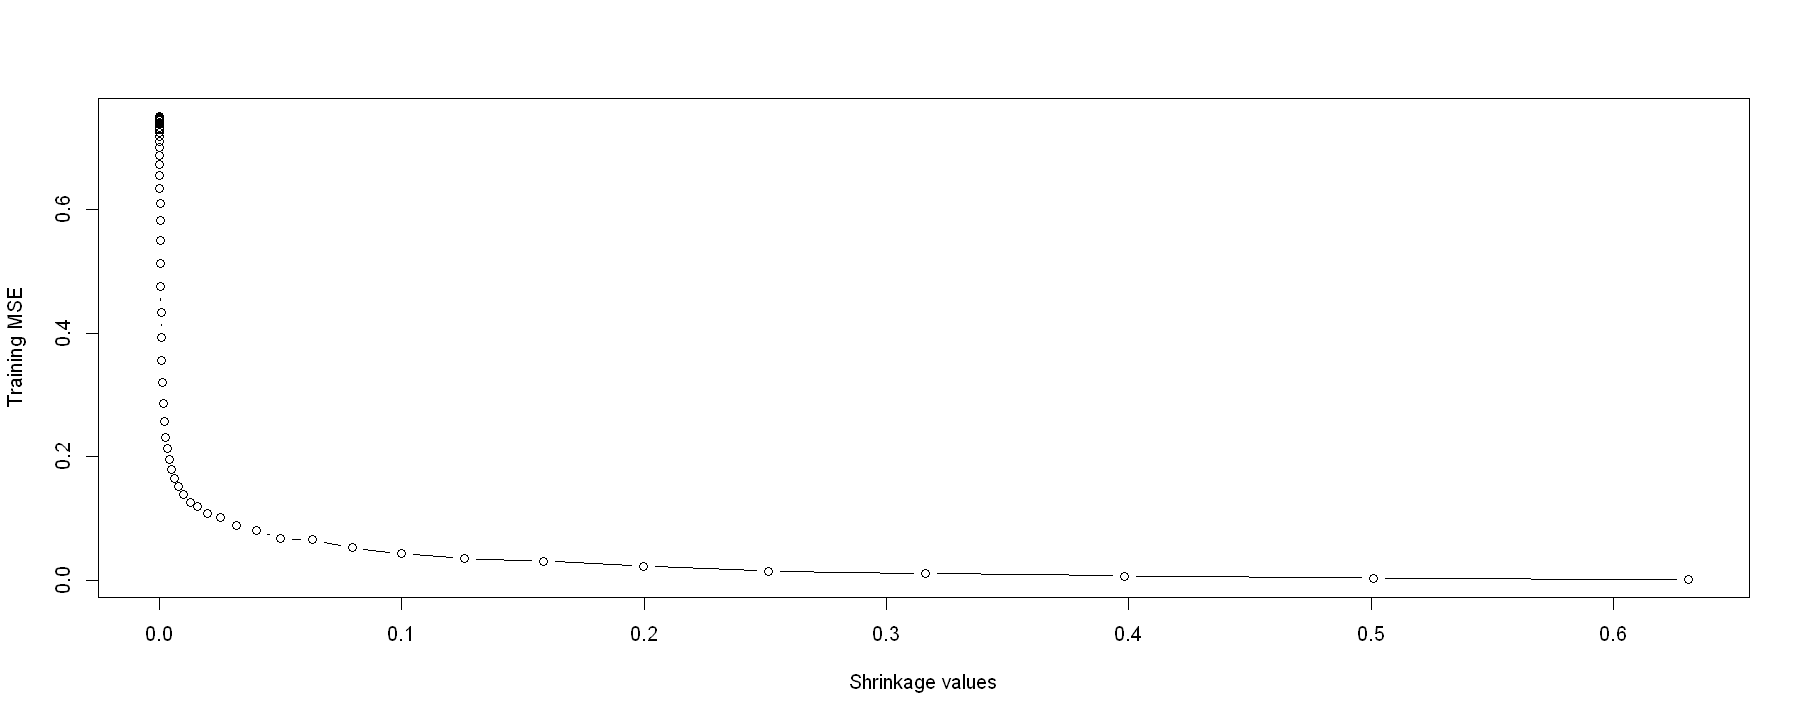

In [40]:
# Fit boosting regression tree-Training MSE
set.seed(1)
p = seq(-10, -0.2, by = 0.1)
lambda = 10^p
train.error = rep(NA, length(lambda))
for (i in 1:length(lambda)) {
    hit_boosttree = gbm(Salary ~ ., data = train_hit, distribution = "gaussian", n.trees = 1000, shrinkage = lambda[i])
    pred.train = predict(hit_boosttree, train_hit, n.trees = 1000)
    train.error[i] = mean((pred.train - train_hit$Salary)^2)
}
plot(lambda, train.error, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")

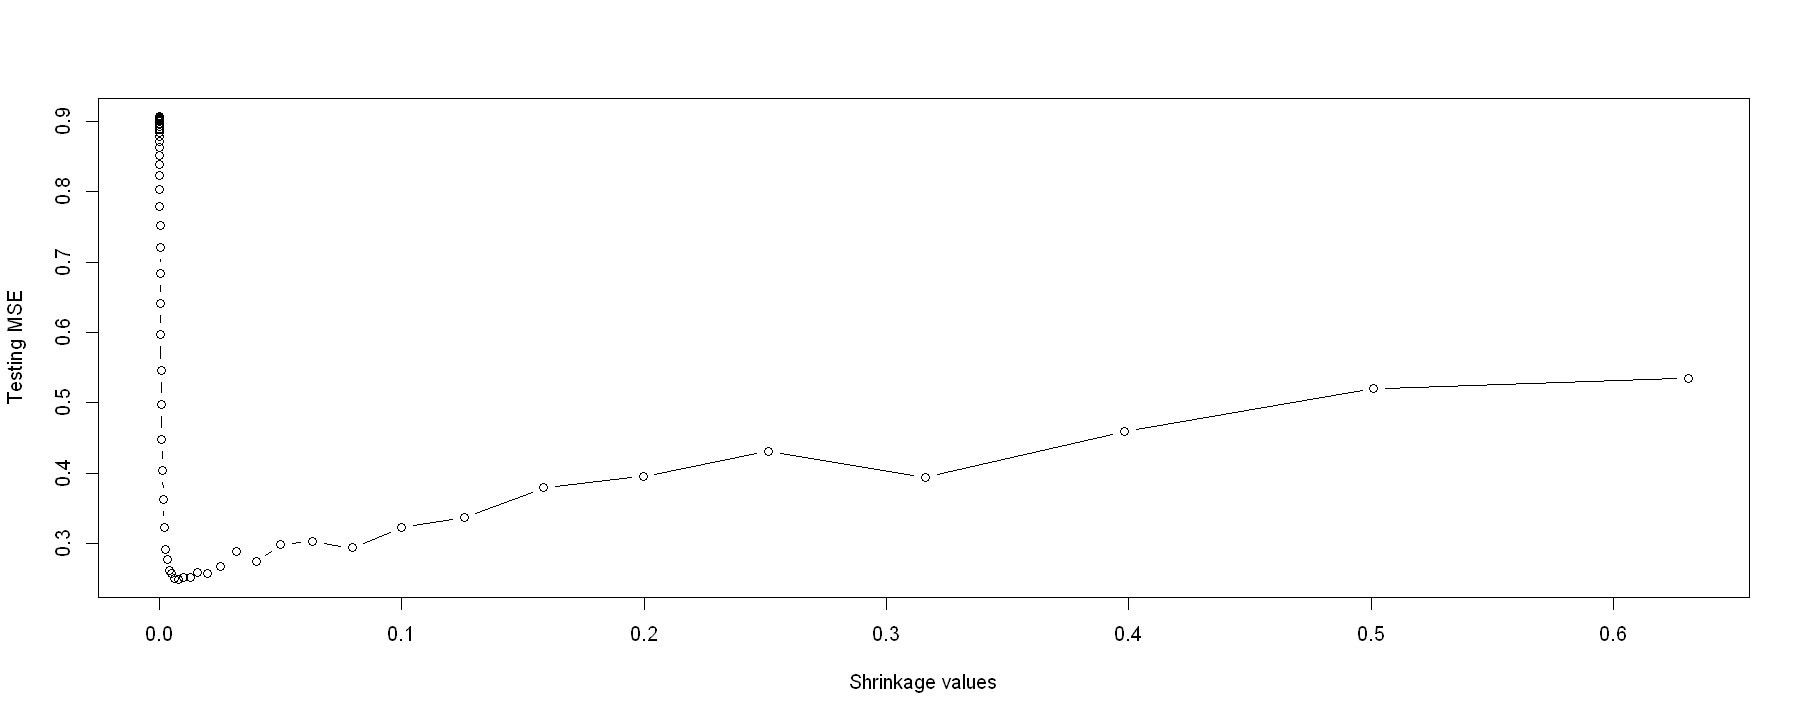

In [41]:
# Fit boosting regression tree-Testing MSE
set.seed(1)
p = seq(-10, -0.2, by = 0.1)
lambda = 10^p
test.error = rep(NA, length(lambda))
for (i in 1:length(lambda)) {
    hit_boosttree = gbm(Salary ~ ., data = train_hit, distribution = "gaussian", n.trees = 1000, shrinkage = lambda[i])
    pred.test = predict(hit_boosttree, test_hit, n.trees = 1000)
    test.error[i] = mean((pred.test - test_hit$Salary)^2)
}
plot(lambda, test.error, type = "b", xlab = "Shrinkage values", ylab = "Testing MSE")

In [42]:
#Minimum test error rate
min(test.error)

[1] 0.2495171

<b>Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches

In [43]:
#load the libraries
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [44]:
#Fit a Linear regression model
linreg_fit = lm(Salary ~ ., data = train_hit)
pred1 = predict(linreg_fit, test_hit)

#Linear regression-test error rate
mean((pred1 - test_hit$Salary)^2)

[1] 0.4848397

In [45]:
# Fit a ridge regression model on the training set
train.matrix <-  model.matrix(Salary ~ ., data = train_hit)
test.matrix <-  model.matrix(Salary ~ ., data = test_hit)
grid <-  10 ^ seq(4, -2, length = 100)
ridge <-  cv.glmnet(train.matrix, train_hit$Salary, 
                        alpha = 0, lambda = grid, thresh = 1e-12)
lambda.val <-  ridge$lambda.min
lambda.val

[1] 0.1629751

In [46]:
#Ridge regression-test error rate
ridge_pred <-  predict(ridge, newx = test.matrix, s = lambda.val)
mean((ridge_pred-test_hit$Salary)^2)

[1] 0.4487008

<b>The test MSE of boosting method is lower than the Linear and Ridge regression

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,21.8788716
PutOuts,PutOuts,8.7242807
RBI,RBI,6.9927095
Walks,Walks,6.4349292
CRBI,CRBI,6.0409054
Hits,Hits,5.7927393
CRuns,CRuns,5.2627954
Errors,Errors,5.0024357
CHmRun,CHmRun,4.9664448


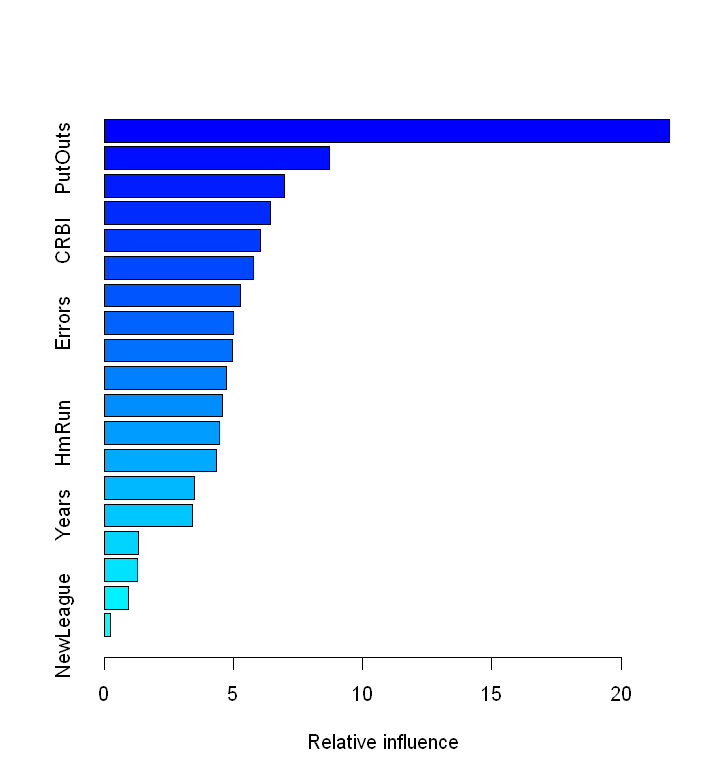

In [47]:
#Most important predictors in the bossted model
options(repr.plot.width=6, repr.plot.height=6.5)
summary(hit_boosttree)

<b>The most important variables og the boosted model are CHits and Putouts.

In [48]:
# Fit bagging model, use all predictors
set.seed(1)
hit_bagtree <- randomForest(Salary~., data=train_hit, mtry=19, importance=T)
hit_bagtree


Call:
 randomForest(formula = Salary ~ ., data = train_hit, mtry = 19,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 19

          Mean of squared residuals: 0.1725994
                    % Var explained: 77

In [49]:
# Make prediction
pred <- predict(hit_bagtree, newdata=test_hit)

# MSE
mean((pred - test_hit$Salary) ^ 2)

[1] 0.2352798

<b>Conclusion:The test set MSE for bagging approach is slightly lower (0.235) than the Boosting method (0.249)